## Upper Confidence Bound (UCB)

**Importing Libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random

**Importing Dataset**

In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [224]:
num_users = data.shape[0]
num_ads = data.shape[1]

**Implementing UCB**

In [249]:
reward =[0]* num_ads    # A list containing accumulated rewards per Ad
Nt= [0]* num_ads      # A list containing the number of times each Ad got clicked
ads_selected=[]
total_reward = 0
N=1000
for agent in range(1000):

    max_upper_bound=0
    for ad in range(num_ads):
        
        if Nt[ad]> 0:
            reward_rate = reward[ad]/Nt[ad]
            upper_bound= reward_rate + np.sqrt(3/2*np.log(agent+1)/(Nt[ad]))

        else:
            upper_bound=1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound=upper_bound
            ad_selected=ad
    
    Nt[ad_selected]+=1
   
    ad_reward= data.iloc[agent, ad_selected]
    
    
    reward[ad_selected]+= ad_reward
    
    ads_selected.append(ad_selected)
total_reward=sum(reward)

**Visualizing the results**

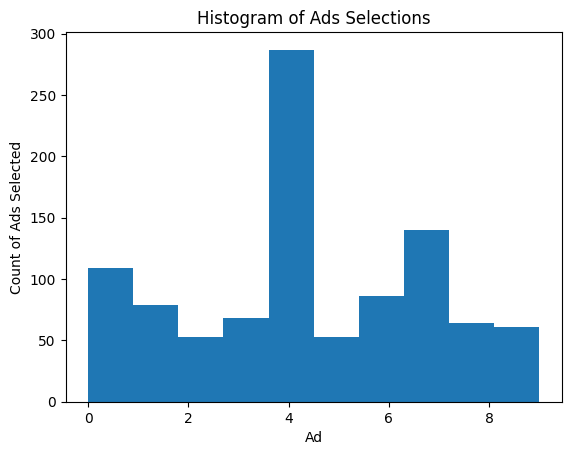

In [250]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ad')
plt.ylabel('Count of Ads Selected')
plt.show()

In [221]:
total_reward

2129